In [1]:
import numpy as np
from PIL import Image, ImageDraw
import xml.etree.ElementTree
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
e = xml.etree.ElementTree.parse('../data/train/segmentation/p05090920585010.xml').getroot()

In [3]:
imagesize = e.find('imagesize')
height = int(imagesize.find('nrows').text)
width = int(imagesize.find('ncols').text)

In [4]:
img = Image.new('L', (width, height), 0)

for obj in e.findall('object'):
    polygon = []
    p = obj.find('polygon')
    for pt in p.findall('pt'):
        x = int(pt.find('x').text)
        y = int(pt.find('y').text)
        polygon.append((x, y))
    ImageDraw.Draw(img).polygon(polygon, outline=1, fill=1)
    img
    

In [5]:
mask = np.array(img)

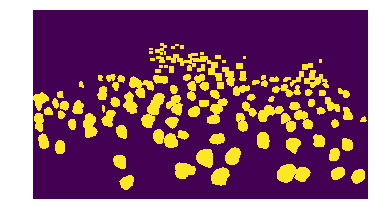

In [6]:
plt.imshow(mask)
plt.axis('off')
plt.show()

In [15]:
from scipy.ndimage.filters import gaussian_filter

In [22]:
mask= mask.astype(np.float)

In [26]:
mask_blurred = gaussian_filter(mask, sigma=3)

In [27]:
mask_blurred.max()

1.0

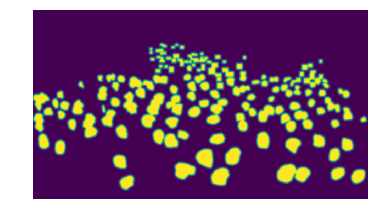

In [28]:
plt.imshow(mask_blurred)
plt.axis('off')
plt.show()